In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def create_folder_if_not_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder {folder_path} created successfully.")
    else:
        print(f"Folder {folder_path} already exists.")


create_folder_if_not_exists("plots")
create_folder_if_not_exists("errors")

interval_start = -0.4
interval_end = 1
base_domain = np.arange(interval_start, interval_end, 0.0014)

exact_solution = np.float64(0.54105887116969952971)


def function_given(x):
    n = 10
    m = 15
    return m * x * np.e ** (-n) - m * np.e ** (-n * x) + 1 / m


def first_derivative(x):
    n = 10
    m = 15
    return m * n * np.e ** (-n * x) + m * np.e ** (-n)

Folder plots already exists.
Folder errors already exists.


**Równomierna dystrybucja**

In [3]:
def even_domain(x_min, x_max, number_of_points):
    return np.linspace(x_min, x_max, number_of_points, dtype=np.double)

**Wizualizacja**

In [4]:
def visualise(domain=None, nodes_x=None, nodes_y=None, f_y=None, Pn_x=None, title=None, x_size=8, y_size=6,
              plot_title=None,
              filename=None):
    '''
    :param domain: array of float64, of x coordinates of points to visualise
    :param nodes_x: array of x coordinates of nodes
    :param nodes_y: array of f(x) for each x in nodes_x
    :param f_y: array of f(x) for each x in domain
    :param Pn_x: array of Pn(x) for each x in domain
    :param title: a string
    :param x_size: size of a figure in x axis
    :param y_size: size of a figure in y axis
    :param plot_title: title of a plot
    :param filename: name of a file to save a figure
    :return: None
    '''
    plt.figure(figsize=(x_size, y_size))
    if nodes_x is not None and nodes_y is not None:
        plt.scatter(nodes_x, nodes_y, label="Węzły", color="green")
    if f_y is not None:
        plt.plot(domain, f_y, label="Zadana funckcja", color="blue")

    if title is not None:
        plt.plot(domain, Pn_x, label=title, color="red")
    if plot_title is not None:
        plt.title(plot_title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    if filename is not None:
        plt.savefig(f"plots/{filename}.png", dpi=300, format='png')
    plt.show()

**Implementacja funkcji do laboratorium**

In [5]:
function_given_values = []
for random_name in range(len(base_domain)):
    function_given_values.append(function_given(base_domain[random_name]))


def get_function_values(X):
    result = np.zeros(len(X), dtype=np.double)
    for i in range(len(X)):
        result[i] = function_given(X[i])
    return result

**Metoda Newtona**

In [6]:
def newton_method(x_start, ro, stop_crt):
    if np.abs(function_given(x_start)) < ro:
        print("early stop for:\nx_start = ", x_start, "\nfunction_given(x_start) = ", function_given(x_start),"\nro = ",ro,"\n")
        return 0, x_start
    for iter_counter in range(int(10e3)):
        x_next = x_start - function_given(x_start) / first_derivative(x_start)
        if stop_crt(x_next, x_start, ro):
            return iter_counter + 1, x_next
        x_start = x_next
    return False, x_start

**Metoda stycznych**

In [7]:
def secant_method(x0, x1, ro, stop_crt):
    def get_next_sqrt_approx():
        nonlocal x0, x1
        if function_given(x1) - function_given(x0) == 0:
            return False
        return x1 - (x1 - x0) / (function_given(x1) - function_given(x0)) * function_given(x1)

    for iter_counter in range(int(10e3)):
        x0, x1 = x1, get_next_sqrt_approx()
        if x1 is False:
            return False, x0
        if stop_crt(x0, x1, ro):
            return iter_counter + 1, x1
    return False, x1


**Wykonanie ćwiczenia**

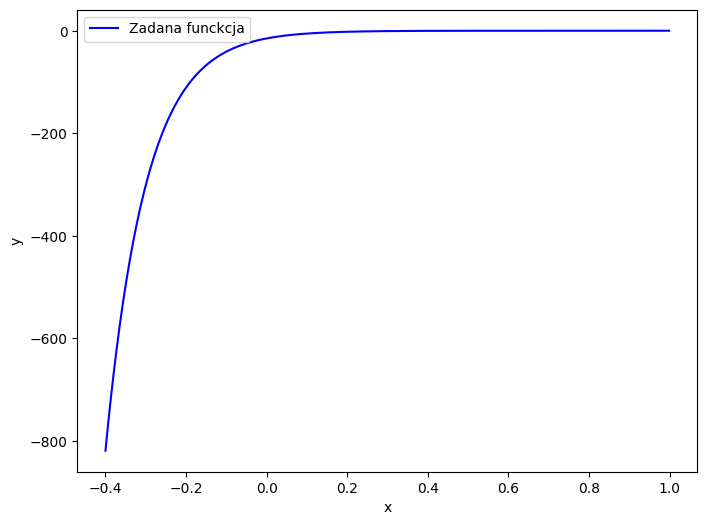

In [8]:
visualise(base_domain, None, None, function_given_values)

In [9]:
import csv


def save_to_csv(filename, data):
    filename = "errors/" + filename + ".csv"
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)


def diff_stop_cond(x1, x0, e):
    return abs(x1 - x0) < e


def value_stop_cond(x, _x, e):
    return abs(function_given(x)) < e

ros = np.array([1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12], dtype=np.float64)

In [ ]:
def perform_newton_experiment(stop_crt):
    global  ros
    starting_points = np.arange(-0.4, 1.1, 0.1)
    iteration_results = [["Punkt startowy\Wartość ro", "10E-2", "10E-4", "10E-6", "10E-8", "10E-10", "10E-12"]]
    value_results = [["Punkt startowy\Wartość ro", "10E-2", "10E-4", "10E-6", "10E-8", "10E-10", "10E-12"]]
    for starting_point in starting_points:
        iteration_newline = [starting_point]
        value_newline = [starting_point]
        for ro in ros:
            iteration_number, value_calculated = newton_method(starting_point, ro, stop_crt)
            if iteration_number is False:
                print("abnormal result for: ", starting_point, ro)
            iteration_newline.append(iteration_number)
            value_newline.append(value_calculated)
        iteration_results.append(iteration_newline)
        value_results.append(value_newline)
    return iteration_results, value_results


iteration_summary, value_summary = perform_newton_experiment(diff_stop_cond)
save_to_csv("newton_diff_iteration", iteration_summary)
save_to_csv("newton_diff_value", value_summary)

iteration_summary, value_summary = perform_newton_experiment(value_stop_cond)
save_to_csv("newton_value_iteration", iteration_summary)
save_to_csv("newton_value_value", value_summary)

In [23]:
def perform_secant_experiment(stop_crt, from_right=False):
    global  ros
    starting_points = np.arange(-0.4, 1.1, 0.1)
    iteration_results = [["Punkt startowy a", "Punkt startowy b", "Wartość ro", "10E-2", "10E-4", "10E-6", "10E-8", "10E-10", "10E-12"]]
    value_results = [["Punkt startowy a", "Punkt startowy b", "10E-2", "10E-4", "10E-6", "10E-8", "10E-10", "10E-12"]]
    if from_right:
        starting_points = starting_points[::-1]
    for first_starting_point in starting_points:
        for second_starting_point in starting_points:
            if not from_right and (first_starting_point >= second_starting_point) or from_right and (first_starting_point <= second_starting_point):
                continue
            iteration_newline = [first_starting_point, second_starting_point]
            value_newline = [first_starting_point, second_starting_point]
            for ro in ros:
                #print("\tro: ", ro)
                iteration_number, value_calculated = secant_method(first_starting_point, second_starting_point, ro, stop_crt)
                if iteration_number is False:
                    #print("abnormal result for: ", first_starting_point, second_starting_point, ro)
                    pass
                iteration_newline.append(iteration_number)
                value_newline.append(value_calculated)
            iteration_results.append(iteration_newline)
            value_results.append(value_newline)
    return iteration_results, value_results


iteration_summary, value_summary = perform_secant_experiment(diff_stop_cond)
save_to_csv("secant_diff_iteration", iteration_summary)
save_to_csv("secant_diff_value", value_summary)

iteration_summary, value_summary = perform_secant_experiment(value_stop_cond)
save_to_csv("secant_value_iteration", iteration_summary)
save_to_csv("secant_value_value", value_summary)

iteration_summary, value_summary = perform_secant_experiment(diff_stop_cond, from_right=True)
save_to_csv("reversed_secant_diff_iteration", iteration_summary)
save_to_csv("reversed_secant_diff_value", value_summary)

iteration_summary, value_summary = perform_secant_experiment(value_stop_cond, from_right=True)
save_to_csv("reversed_secant_value_iteration", iteration_summary)
save_to_csv("reversed_secant_value_value", value_summary)